# Ours

In [2]:
import pandas as pd
import glob
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def analyze_model_results(model_name):
    # Construct the full folder path using a fixed base path
    full_folder_path = model_name
    
    # Using glob to find all JSON files in the directory
    json_files = glob.glob(f"{full_folder_path}/*.json")
    
    # List to hold the data
    data = []
    
    # Iterating through each file and extract the 3 columns we need
    for file in json_files:
        with open(file, 'r') as f:
            json_data = json.load(f)
            # Extracting the required fields
            document_depth = json_data.get("depth_percent", None)
            context_length = json_data.get("context_length", None)
            score = json_data.get("score", None)
            # Appending to the list
            data.append({
                "Document Depth": document_depth,
                "Context Length": context_length,
                "Score": score
            })
    
    # Creating a DataFrame
    df = pd.DataFrame(data)
    

    
    # Pivot Table creation and analysis
    pivot_table = pd.pivot_table(df, values='Score', index=['Document Depth', 'Context Length'], aggfunc='mean').reset_index()
    pivot_table = pivot_table.pivot(index="Document Depth", columns="Context Length", values="Score")
    
    overall_mean = pivot_table.mean().mean()
    
    # Heatmap creation
    cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])
    plt.figure(figsize=(17.5, 8))
    sns.heatmap(
        pivot_table,
        #annot=True,  # Show annotations
        fmt=".1f",  # Formatting annotations
        cmap=cmap,
        cbar_kws={'label': 'Score'},
        vmin=0, vmax=100,
        linewidths=0.5,  # Add lines between cells
        linecolor='gray'  # Line color
    )
    
    plt.title('Fact Retrieval Across Context Lengths ("Needle In A HayStack")')
    plt.xlabel('Token Limit')
    plt.ylabel('Depth Percent')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
  
    # Output results
    print(df.head())
    print(f"You have {len(df)} rows")
    print("Overall Mean of Pivot Table:", overall_mean)
    pdf.savefig(fig) 
    plt.show()

   Document Depth  Context Length       Score
0            56.0           12000  100.000000
1            33.0            7000  100.000000
2            67.0           12000  100.000000
3            33.0           28000   41.666667
4             0.0            3000  100.000000
You have 320 rows
Overall Mean of Pivot Table: 99.453125


NameError: name 'pdf' is not defined

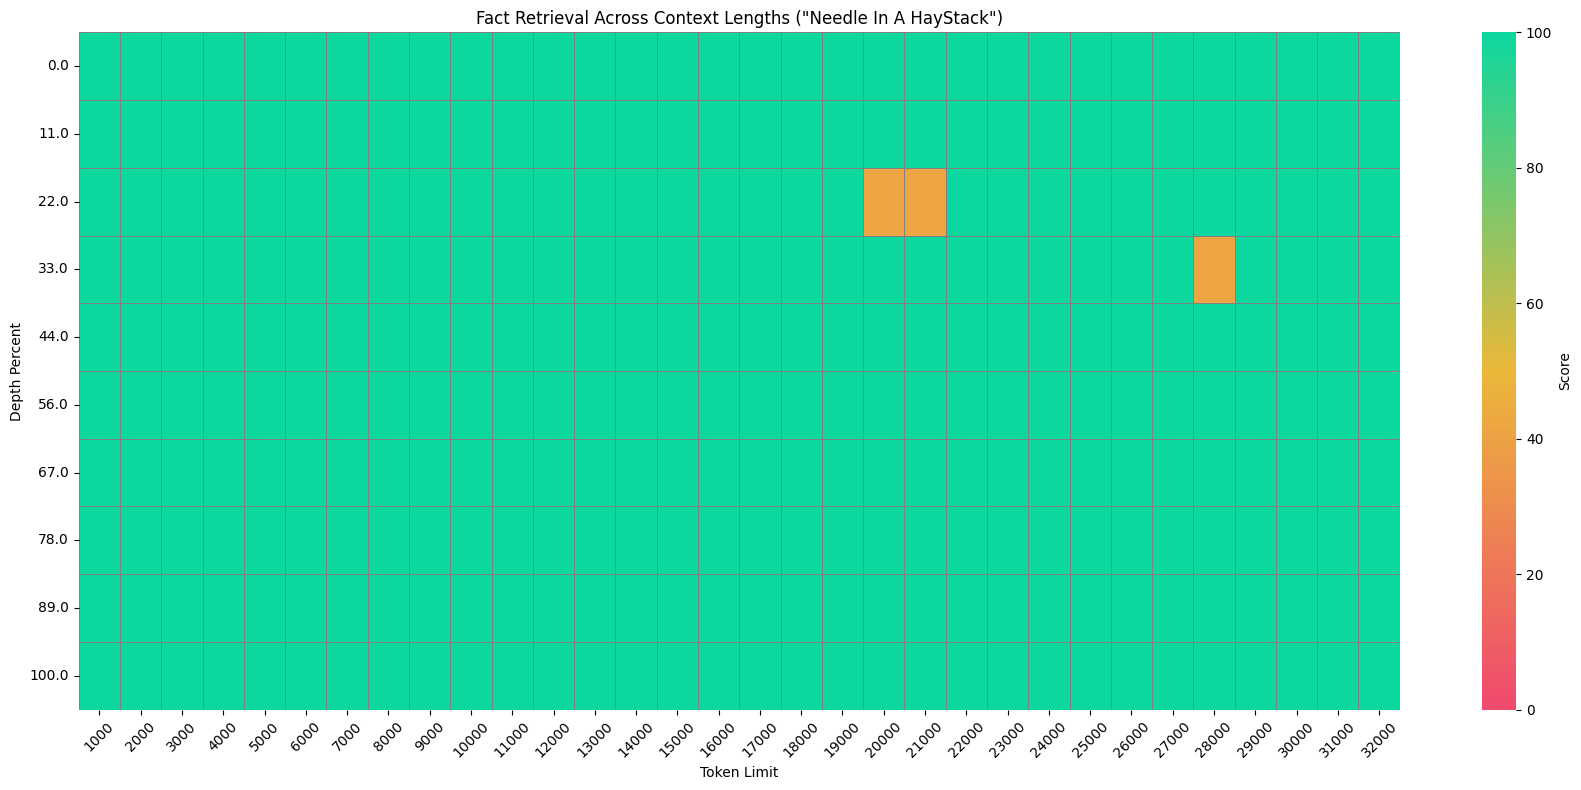

In [3]:
analyze_model_results("/home/yuhao/From-Fragment-to-Fabric-Long-Context-Scaling-with-Short-Instruction-Tuning-Data/Evaluations/NIAH/results/graph_ours/Llama2-7b-50step")
